In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import math
%matplotlib inline
import time
# from tempfile import TemporaryFile
# outfile = TemporaryFile()

In [2]:
# def dotproduct(v1, v2):
#     return sum((a*b) for a, b in zip(v1, v2))

In [3]:
def angle(v1, v2):
    """
    calculate angel between v1 and v2
    """
    def length(v):
        return math.sqrt(np.dot(v, v))
    
    return math.acos(np.dot(v1, v2) / (length(v1) * length(v2)))

In [4]:
def min_angle(array, idx):
    """
    array in 2-D form, which include all vectors
    idx is index of one vector in array
    """
    array_without_vec = np.vstack([array[0:idx,:], array[idx+1:,:]])
    angles = [angle(array[idx], array_without_vec[i]) for i in range(len(array_without_vec))]
    
    res = min(angles)
    return res

In [5]:
def min_angles_mean(array):
    """
    array in 2-D form
    return a 1-D array with min_angle
    """
    min_angles = [min_angle(array, idx) for idx in range(array.shape[0])]
#     print(len(min_angles))
    res = np.mean(min_angles)
    return res

In [6]:
min_angles_means = []
n_sample = 100
dim = 1000
st = time.time()

In [7]:
for i in range(dim-1):
    X = np.random.rand(n_sample, i+1)*2-1
    min_mean = min_angles_mean(X)
    min_angles_means.append(min_mean)

In [8]:
# # instead of plot, save *.txt
# np.savetxt('outfile.txt', min_angles_means)
# tmp = np.loadtxt('outfile.txt')

In [9]:
et = time.time()
print('the time cost is:', et-st)
y = range(len(min_angles_means))

the time cost is: 35.362021923065186


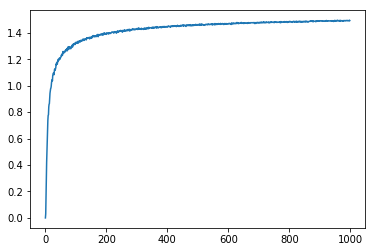

In [10]:
plt.plot(y, min_angles_means)